
**************************************************
Welcome to the music recommendation program
1. Predict Music Genre by Age/Gender
2. View Music Genres Recommended by Age and Gender (graphs)
3. Retrieve the accuracy score of the data product
4. Exit
************************************************** 

Enter any of the following options : 3
3

 -> The accuracy score of this data product is measured from 0 to 1 (1 being 100%):  0.6 


**************************************************
Welcome to the music recommendation program
1. Predict Music Genre by Age/Gender
2. View Music Genres Recommended by Age and Gender (graphs)
3. Retrieve the accuracy score of the data product
4. Exit
************************************************** 

Enter any of the following options : 2
2


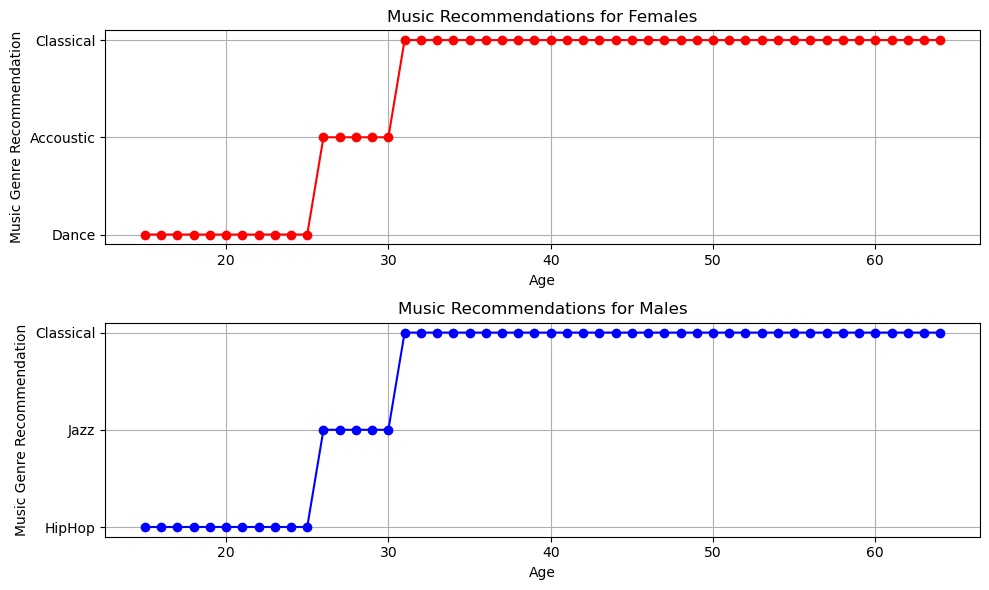

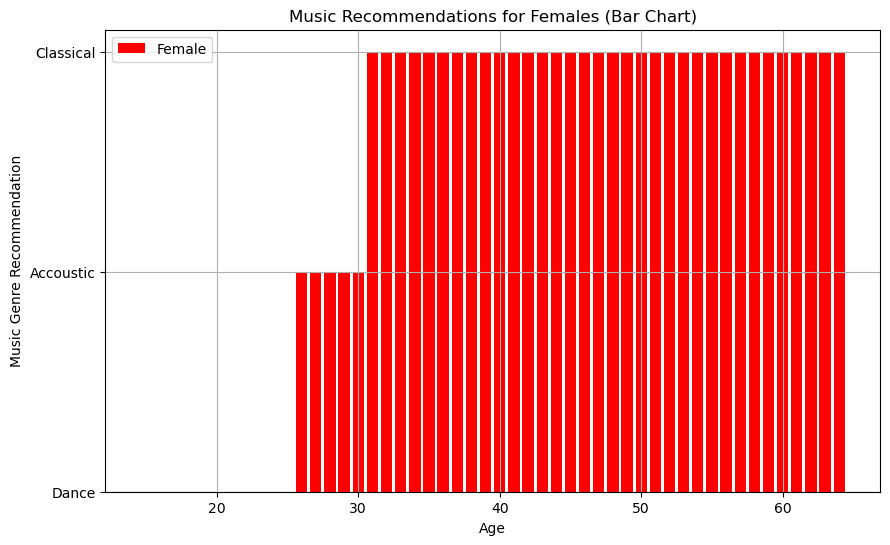

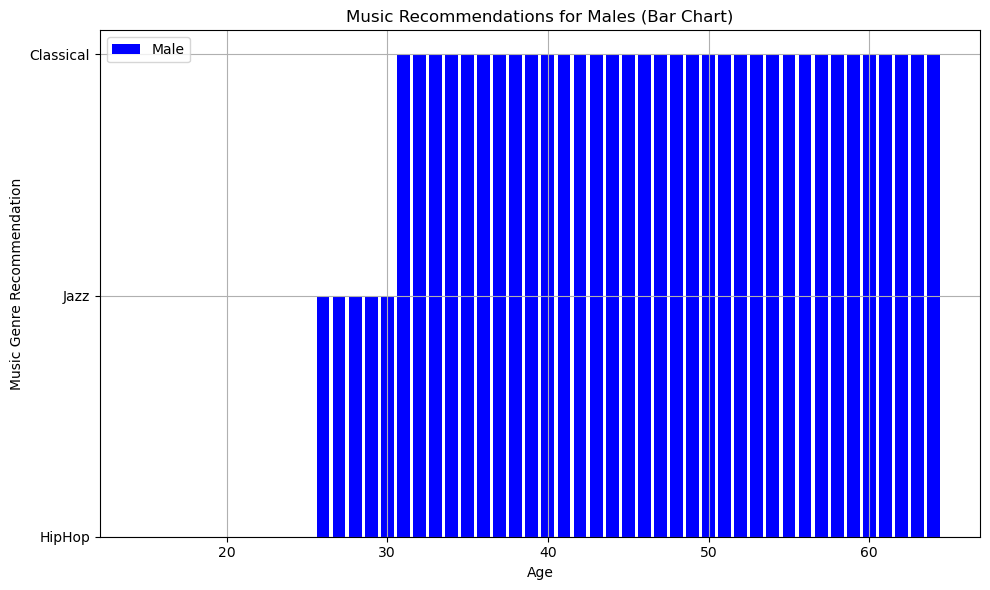

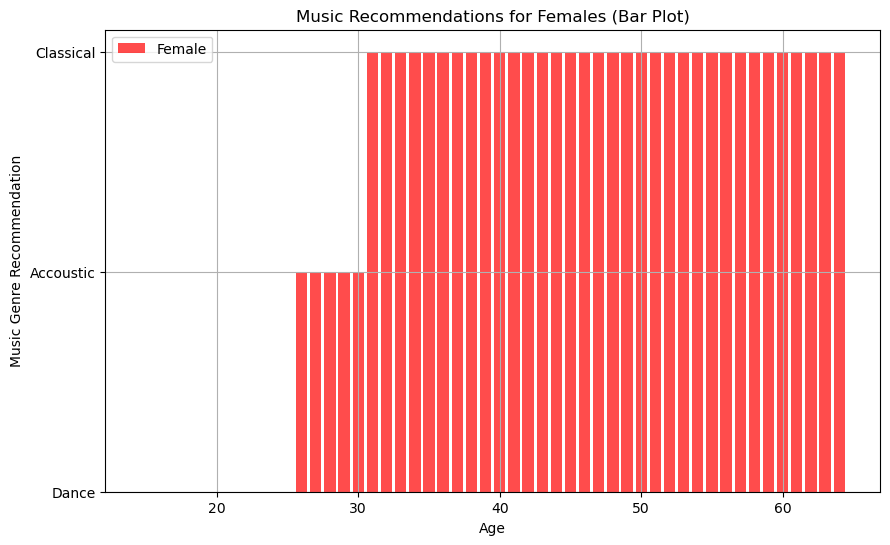

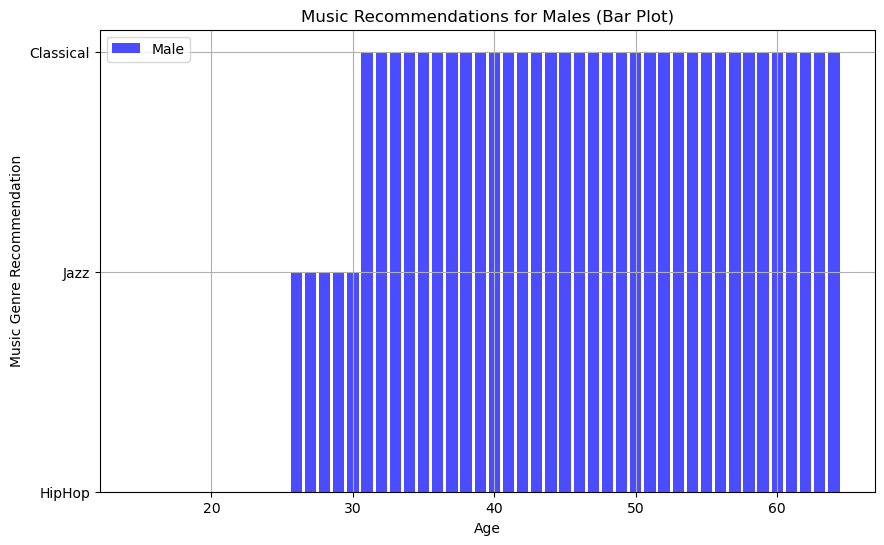


**************************************************
Welcome to the music recommendation program
1. Predict Music Genre by Age/Gender
2. View Music Genres Recommended by Age and Gender (graphs)
3. Retrieve the accuracy score of the data product
4. Exit
************************************************** 



In [ ]:
# Here we are importing several libraries that will allow us to create our model and predict music genres based on age
# and gender. A library is also included to get the accuracy score of our model. 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import bcrypt 

model = joblib.load( 'music_recommender.joblib') # loading our model so we do not have to retrain it every time.

# Define the range of ages and genders you want to visualize
age_range = range(15, 65)  # Define an appropriate age range
gender_values = [0, 1]  # 0 for female, 1 for male

# Create lists to store the results for each gender
ages_female = []
predictions_female = []
ages_male = []
predictions_male = []

# Generate predictions for the age and gender combinations
for age in age_range:
    for gender in gender_values:
        prediction = model.predict([[age, gender]])[0]
        if gender == 0:  # Female
            ages_female.append(age)
            predictions_female.append(prediction)
        else:  # Male
            ages_male.append(age)
            predictions_male.append(prediction)

# This is our while loop so the program can re-run until user decides to exit the program
while True: 
     
    # Our welcome message to print to the console    
    print()
    print("*" * 50)
    print("Welcome to the music recommendation program")
    print("1. Predict Music Genre by Age/Gender")
    print("2. View Music Genres Recommended by Age and Gender (graphs)")
    print("3. Retrieve the accuracy score of the data product")
    print("4. Exit")
    print("*" * 50, '\n')


    user_input = int(input("Enter any of the following options : ")) # accepting user input for the options above
    print (user_input)

    # Here we are testing the user input depending on the options selected
    if user_input == 1:
        # This block will ask the user for age and gender to predict a music genre as well as data validation
        try: 
            age = int(input("Enter the age : "))
            gender = int(input("Enter the gender (0 for female | 1 for male) : "))
        
            prediction = model.predict([[age, gender]])[0]
            print()
            print("\n -> Music Genre Recommendation is : ", prediction, '\n')
            print()
    
        except ValueError:
            print("Sorry Incorrect Input!")
            exit()
    elif user_input == 2:
            # This block of code creates all our visuals for the predictions.
        
            # Create DataFrames for each gender
            df_female = pd.DataFrame({'Age': ages_female, 'Genre': predictions_female, 'Gender': 'Female'})
            df_male = pd.DataFrame({'Age': ages_male, 'Genre': predictions_male, 'Gender': 'Male'})

            # Create line charts for each gender
            plt.figure(figsize=(10, 6))

            # Create a line chart for females
            plt.subplot(2, 1, 1)  # 2 rows, 1 column, first chart
            plt.plot(df_female['Age'], df_female['Genre'], marker='o', label='Female', color = 'red')
            plt.xlabel('Age')
            plt.ylabel('Music Genre Recommendation')
            plt.title('Music Recommendations for Females')
            plt.grid(True)
        
            # Create a line chart for males
            plt.subplot(2, 1, 2)  # 2 rows, 1 column, second chart
            plt.plot(df_male['Age'], df_male['Genre'], marker='o', label='Male', color ='blue')
            plt.xlabel('Age')
            plt.ylabel('Music Genre Recommendation')
            plt.title('Music Recommendations for Males')
            plt.grid(True)

            plt.tight_layout()  # Adjust subplot layout for better spacing
            plt.show()
        
            print()
      
            # Create a bar chart for females
            plt.figure(figsize=(10, 6))
            plt.bar(df_female['Age'], df_female['Genre'], color='red', label='Female')
            plt.xlabel('Age')
            plt.ylabel('Music Genre Recommendation')
            plt.title('Music Recommendations for Females (Bar Chart)')
            plt.legend()
            plt.grid(True)

            # Create a bar chart for males
            plt.figure(figsize=(10, 6))
            plt.bar(df_male['Age'], df_male['Genre'], color='blue', label='Male')
            plt.xlabel('Age')
            plt.ylabel('Music Genre Recommendation')
            plt.title('Music Recommendations for Males (Bar Chart)')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()  # Adjust subplot layout for better spacing
            plt.show()
            print()
            
            # Create a bar plot for females
            plt.figure(figsize=(10, 6))
            plt.bar(df_female['Age'], df_female['Genre'], color='red', label='Female', alpha=0.7)
            plt.xlabel('Age')
            plt.ylabel('Music Genre Recommendation')
            plt.title('Music Recommendations for Females (Bar Plot)')
            plt.legend()
            plt.grid(True)
            plt.show()

            # Create a bar plot for males
            plt.figure(figsize=(10, 6))
            plt.bar(df_male['Age'], df_male['Genre'], color='blue', label='Male', alpha=0.7)
            plt.xlabel('Age')
            plt.ylabel('Music Genre Recommendation')
            plt.title('Music Recommendations for Males (Bar Plot)')
            plt.legend()
            plt.grid(True)
            plt.show()
    elif user_input == 3:
        # This is where the accuracy score is tested / provided to the user 
        # as the model learns, the accuracy score will vary.
        copy_data = pd.read_csv('musicDataset-copy.csv')
        X = copy_data.drop(columns=['genre'])
        y = copy_data['genre']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        model2 = DecisionTreeClassifier()
        model2.fit(X_train, y_train)
        predictions2 = model2.predict(X_test)
        score = accuracy_score(y_test, predictions2)

        print('\n', "-> The accuracy score of this data product is measured from 0 to 1 (1 being 100%): ", score, '\n')

    elif user_input == 4: 
        print("Goodbye :)")
        break;
    else:
        print("Invalid, Try again please :)", '\n')